In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [2]:
flower = pd.read_csv("Book7.csv")

In [3]:
flower.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sl       150 non-null float64
sw       150 non-null float64
pl       150 non-null float64
pw       150 non-null float64
class    150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
flower['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [6]:
flower.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B96D42BE88>,
      dtype=object)

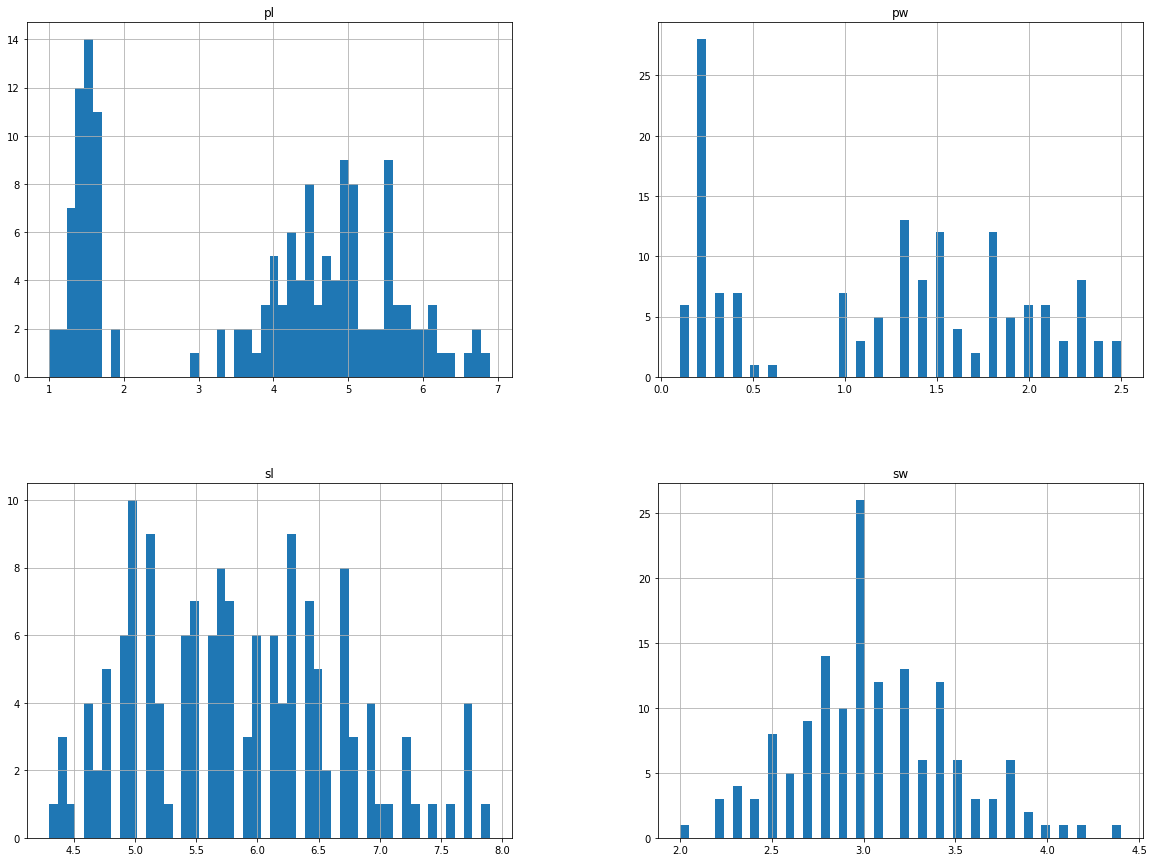

In [9]:
flower.hist(bins=50,figsize=(20,15))

In [10]:
#import numpy as np
#def train_test_split(data,test_ratio):
 #   np.random.seed(42)
  #  shuffled = np.random.permutation(len(data))
   # test_size = int(len(data)*test_ratio)
   # test_indices = shuffled[:test_size]
   # train_indices = shuffled[test_size:]
    #return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(flower,test_size = .2,random_state = 42)
print(f"the test data is{len(test_set)} and the train data is {len(train_set)}")







the test data is30 and the train data is 120


In [12]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
flower['class'] = le.fit_transform(flower['class'])

In [13]:
flower['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B96E4F2808>,
      dtype=object)

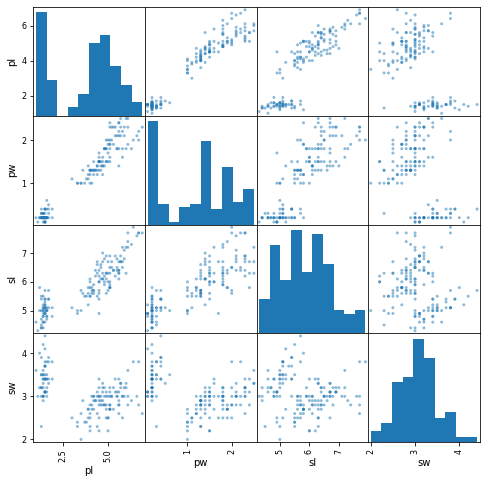

In [14]:
corr_matrix = flower.corr()
corr_matrix["pl"].sort_values(ascending = False)
from pandas.plotting import scatter_matrix
attribute = ['pl','pw','sl','sw']
scatter_matrix(flower[attribute],figsize = (8,8))

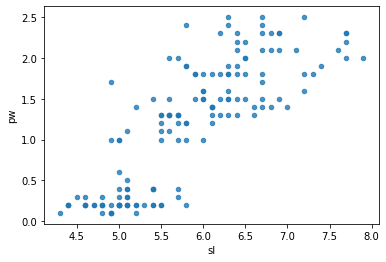

In [15]:
flower.plot(kind = 'scatter', x = 'sl', y = 'pw', alpha = 0.8)

In [16]:
flower['slpw'] = flower['sl']/flower['pw']

In [17]:
flower['slpw']

0      25.500000
1      24.500000
2      23.500000
3      23.000000
4      25.000000
         ...    
145     2.913043
146     3.315789
147     3.250000
148     2.695652
149     3.277778
Name: slpw, Length: 150, dtype: float64

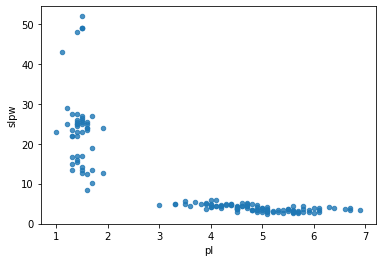

In [18]:
corr_matrix = flower.corr()
corr_matrix["pl"].sort_values(ascending = False)
#from pandas.plotting import scatter_matrix
#attribute = ['pl','pw','sl','sw','slpw']
#scatter_matrix(flower[attribute],figsize = (8,8))
flower.plot(kind = 'scatter', x = 'pl', y = 'slpw', alpha = 0.8)

In [19]:
x = np.array(flower)
y = np.array(flower['class'])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [21]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [22]:
reg = LinearRegression()
#reg = RandomForestClassifier()
#reg = DecisionTreeClassifier()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#flower.keys()

In [24]:
prediction = reg.predict(x_test)

In [25]:
prediction

array([ 1.00000000e+00,  5.84053288e-16,  2.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  7.15972106e-16,  1.00000000e+00,  2.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  2.00000000e+00, -1.47151868e-15,
        1.75345170e-16, -1.50802516e-15,  4.26281575e-16,  1.00000000e+00,
        2.00000000e+00,  1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
       -1.87607602e-16,  2.00000000e+00,  4.99017590e-16,  2.00000000e+00,
        2.00000000e+00,  2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        3.14225648e-16, -1.62620742e-16,  3.47423980e-17,  8.90788322e-16,
        1.00000000e+00, -1.50181965e-16, -1.57557918e-16,  2.00000000e+00,
        1.00000000e+00,  9.64645091e-18, -5.32384788e-18, -1.47107175e-15,
        2.00000000e+00,  1.00000000e+00,  1.00000000e+00,  8.15002762e-16,
        7.62052070e-17])

In [27]:
errors = mean_squared_error(y_test,prediction)

errors

2.4272454983471285e-31